Tentang Dataset :

Pada sebuah lembaga kemanusiaan berbasis teknologi informasi, dibentuk beberapa tim kemanusiaan yang bertugas untuk terjun ke masyarakat memberikan bantuan dalam bentuk aplikasi komputer atau layanan pelatihan IT.  Kegiatn tersebut dilaksanakan setiap tahun dengan ketentuan anggota organisasi tersebut dapat bergabung ke beberapa tim sebagai ketua atau anggota. Terdapat pula anggota yang sudah tidak aktif di organisasi tersebut (terhapus di database mereka —> label #N/A).  Organisasi tersebut juga melakukan rekrutmen volunteer, namun tidak semua tim menggunakan bantuan volunteer. Hasil kegiatan dari setiap tim dapat diwujudkan ke dalam sebuah pengakuan hak cipta atau publikasi karya ilmiah atau publikasi berita di media massa.

Soal:
1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)

2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)

3. Tentukan data validasi! (5 poin)

4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)

5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)

6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)

7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search! (20 poin)

8. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)

In [ ]:
! gdown --id 18r4hWTeVRrsTRnQp3szcBWPJXOh0XOG1

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18r4hWTeVRrsTRnQp3szcBWPJXOh0XOG1
To: /content/dataset_quiz.xlsx
100% 15.9k/15.9k [00:00<00:00, 10.5MB/s]


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel('/content/dataset_quiz.xlsx')

df.tail(10)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
75,8804.0,8003.0,8803.0,8005.0,9102.0,NaN,TIDAK,0,2022,REGULER,ADA,Hak Cipta,SUDAH,YA,Publikasi Media Massa,Terpublikasi
76,5911.0,9002.0,9101.0,8702.0,8807.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
77,8812.0,9003.0,8906.0,8701.0,NaN,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
78,8805.0,7308.0,569.0,9106.0,NaN,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
79,NaN,NaN,NaN,7607.0,NaN,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
80,8803.0,8804.0,9102.0,8005.0,9303.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,NaN,NaN,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
84,8102.0,7109.0,5903.0,7206.0,8903.0,NaN,TIDAK,0,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [ ]:
# Identifikasi missing value
df.isnull().tail(10)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
75,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
76,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
77,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
78,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
79,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False
80,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
81,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
82,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
83,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
84,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
# menghitung jumlah data missing
df.isnull().sum()

id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

In [ ]:
# Impute nilai NaN dengan modus
# Tidak menggunakan mean karena nomor identitas / id tidak memungkinkan memiliki rata-rata
# Namun sangat memungkinkan jika dari list nomor id didapatkan id yang sering muncul/modus

from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=np.nan, strategy="most_frequent", copy=False)
feature_columns = ['id_ketua', 'id_anggota1', 'id_anggota2', 'id_anggota3', 'id_anggota4']

df[feature_columns] = fill_values.fit_transform(df[feature_columns])

In [ ]:
# Cek data
df.tail(10)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
75,8804.0,8003.0,8803.0,8005.0,9102.0,NaN,TIDAK,0,2022,REGULER,ADA,Hak Cipta,SUDAH,YA,Publikasi Media Massa,Terpublikasi
76,5911.0,9002.0,9101.0,8702.0,8807.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
77,8812.0,9003.0,8906.0,8701.0,8901.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
78,8805.0,7308.0,569.0,9106.0,8901.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
79,8402.0,7607.0,7903.0,7607.0,8901.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
80,8803.0,8804.0,9102.0,8005.0,9303.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,8602.0,8901.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
84,8102.0,7109.0,5903.0,7206.0,8903.0,NaN,TIDAK,0,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [ ]:
# Menghapus kolom id_anggota5 karena missing value lebih banyak dibandingkan not missing
del df['id_anggota5']

In [ ]:
# Cek data
df.tail(10)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
75,8804.0,8003.0,8803.0,8005.0,9102.0,TIDAK,0,2022,REGULER,ADA,Hak Cipta,SUDAH,YA,Publikasi Media Massa,Terpublikasi
76,5911.0,9002.0,9101.0,8702.0,8807.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
77,8812.0,9003.0,8906.0,8701.0,8901.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
78,8805.0,7308.0,569.0,9106.0,8901.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
79,8402.0,7607.0,7903.0,7607.0,8901.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
80,8803.0,8804.0,9102.0,8005.0,9303.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,8602.0,8901.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
84,8102.0,7109.0,5903.0,7206.0,8903.0,TIDAK,0,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


**5 visualisasi**

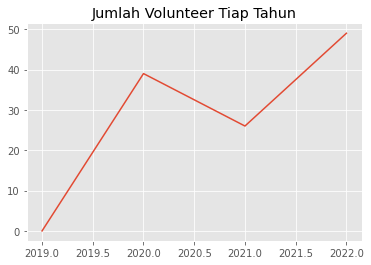

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = df['tahun'].unique()
y = df.groupby('tahun')['jml_vltr_terlibat'].sum()
plt.title('Jumlah Volunteer Tiap Tahun')
plt.plot(x, y)
plt.show()

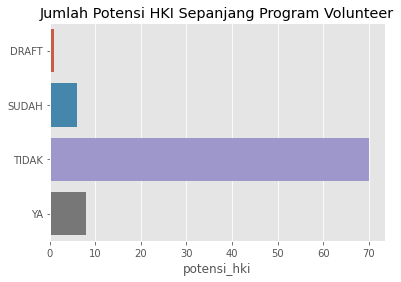

In [ ]:
import seaborn as sns

labels = df['potensi_hki'].unique()
labels.sort()
value = df.groupby(['potensi_hki'])['potensi_hki'].count()
plt.title('Jumlah Potensi HKI Sepanjang Program Volunteer')
sns.barplot(x=value,y=labels)
plt.show()

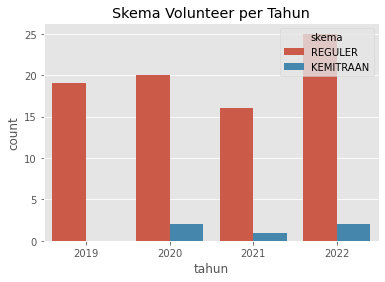

In [ ]:
plt.title('Skema Volunteer per Tahun')
sns.countplot(x="tahun", hue="skema", data=df)

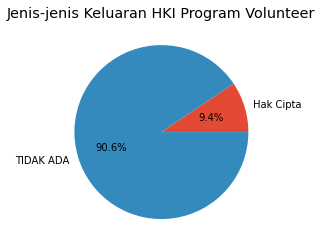

In [ ]:
my_data = df.groupby(['jenis_luaran_hki'])['jenis_luaran_hki'].count()
my_labels = df['jenis_luaran_hki'].unique()
my_labels.sort()
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Jenis-jenis Keluaran HKI Program Volunteer')
plt.show()

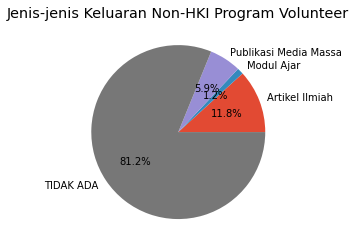

In [ ]:
my_data = df.groupby(['jenis_luaran_lain'])['jenis_luaran_lain'].count()
my_labels = df['jenis_luaran_lain'].unique()
my_labels.sort()
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Jenis-jenis Keluaran Non-HKI Program Volunteer')
plt.show()

**Preprocessing**

In [ ]:
# Encoding label agar data data kategorikal bisa terbaca
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
  df[column]=le.fit_transform(df[column])

df.tail(10)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
75,27,12,22,10,27,0,0,3,1,0,0,1,1,2,2
76,1,32,34,21,18,1,3,3,1,1,1,2,0,3,1
77,29,33,30,20,19,1,3,3,1,1,1,2,0,3,1
78,28,7,0,39,19,1,3,3,1,1,1,2,0,3,1
79,20,9,11,4,19,1,3,3,1,1,1,2,0,3,1
80,26,26,35,10,33,1,3,3,1,1,1,2,0,3,1
81,3,28,33,43,26,1,3,3,1,1,1,2,0,3,1
82,21,29,20,18,19,1,3,3,1,1,1,2,0,3,1
83,25,19,39,38,1,1,3,3,1,1,1,2,0,3,1
84,15,4,1,3,20,0,0,3,1,1,1,2,0,3,1


In [ ]:
# Seleksi fitur
X = df.drop('keterlibatan_vltr', axis='columns')
y = df['keterlibatan_vltr']

In [ ]:
X

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,4,6,3,18,4,0,0,1,1,1,2,0,3,1
1,5,4,14,8,31,0,0,1,1,1,2,0,3,1
2,1,15,18,37,25,0,0,1,1,1,2,0,3,1
3,20,10,16,30,20,0,0,1,1,1,2,0,3,1
4,17,17,2,1,13,0,0,1,1,1,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,26,26,35,10,33,3,3,1,1,1,2,0,3,1
81,3,28,33,43,26,3,3,1,1,1,2,0,3,1
82,21,29,20,18,19,3,3,1,1,1,2,0,3,1
83,25,19,39,38,1,3,3,1,1,1,2,0,3,1


In [ ]:
y

0     0
1     0
2     0
3     0
4     0
     ..
80    1
81    1
82    1
83    1
84    0
Name: keterlibatan_vltr, Length: 85, dtype: int64

In [ ]:
# Pemisahan data training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Penyelesaian


*   Klasifikasi 1 dengan Decision Tree
*   Menghitung Akurasi
*   ROC Curve & Confusion Matrix dari Decision Tree
*   Tuning Hyperparameter dengan Grid Search
*   Visualisasi dt




Test set accuracy: 0.95

Confusion Matrix


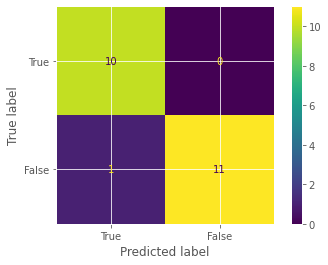

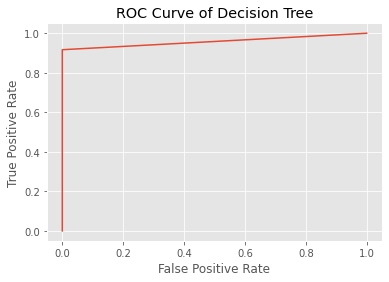

[Text(0.4, 0.875, 'X[5] <= 0.5\ngini = 0.494\nsamples = 63\nvalue = [35, 28]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.6, 0.625, 'X[3] <= 8.0\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.4, 0.375, 'X[3] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]')]

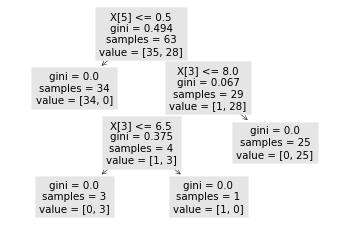

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn import tree

# Inisiasi dt
dt = DecisionTreeClassifier()

# Sesuaikan dt ke data training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

# Menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))

# Menghitung Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt_display = ConfusionMatrixDisplay(confusion_matrix  = cm_dt, display_labels = [True, False])
print("\nConfusion Matrix")
cm_dt_display.plot()
plt.show()

print('\n\n')
# Mendefinisikan set ROC
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_pred_dt)

# Menampilkan hasil ROC curve
plt.title("ROC Curve of Decision Tree")
plt.plot(fpr_dt,tpr_dt)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print('\n\n')
# Visualisasi dt
tree.plot_tree(dt)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# definisikan hyperparameter yang akan digunakan
# sklearn menerima dalam bentuk dictionary
# nama hyperparameter HARUS SESUAI dengan dokumentasi sklearn

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : list(range(5,11))
}

# inisiasi rs berdasarkan nilai hyperparameter
rs = RandomizedSearchCV(dt, param_distributions=params)

# Fit / latih berdasarkan rs
# %timeit merupakan magic command di dalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
%timeit rs.fit(X, y)

# Evaluasi dengan score
score_dt = rs.score(X,y)

print(f'Hasil evaluasi: {score_dt}')
print(f'Konfigurasi hyperparameter: {rs.best_params_}')

216 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'max_depth': 10, 'criterion': 'entropy'}


Penyelesaian


*   Klasifikasi 2 dengan SVC
*   Menghitung Akurasi
*   ROC Curve & Confusion Matrix dari SVC
*   Tuning Hyperparameter dengan GridSearch
*   Visualisasi SVC




Test set accuracy: 0.59

Confusion Matrix


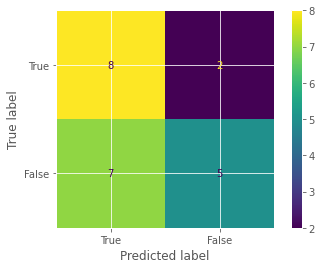

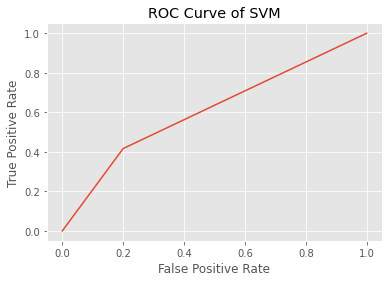

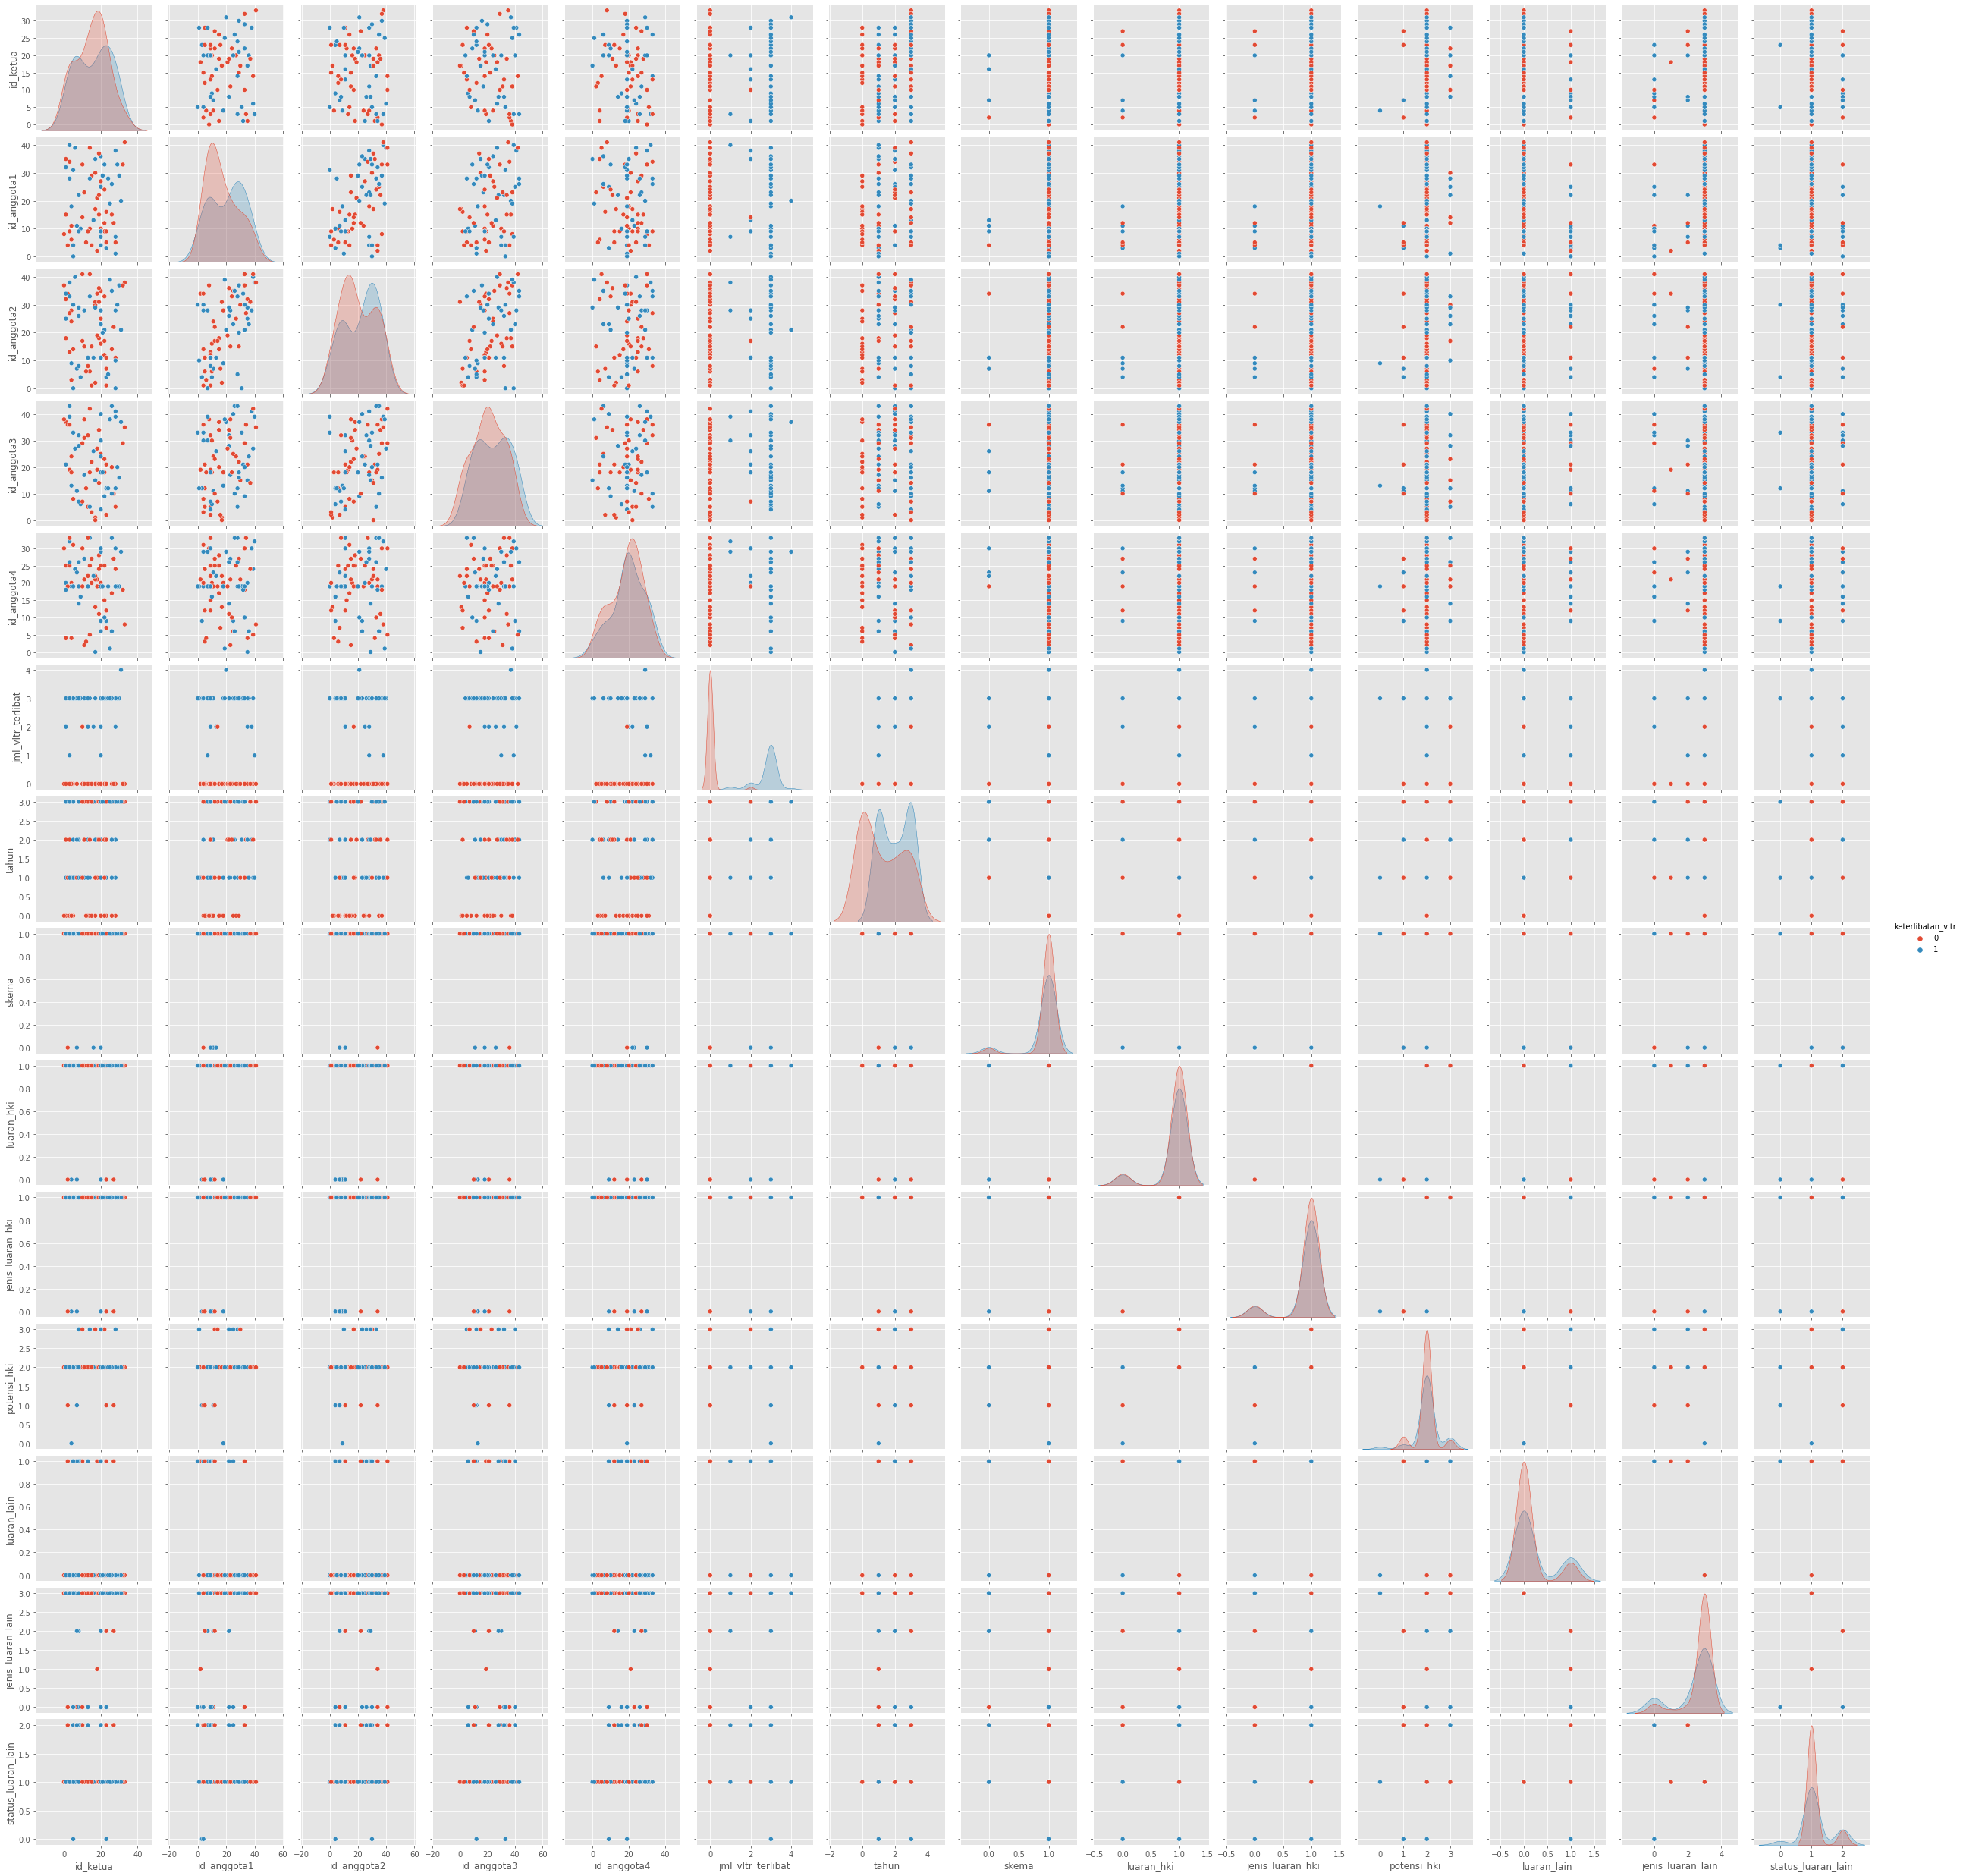

In [ ]:
from sklearn.svm import SVC
import seaborn as sns

# Inisiasi svc
svc = SVC()

# Sesuaikan svc ke data training
svc.fit(X_train, y_train)

# Memprediksi label set test
y_pred_svc = svc.predict(X_test)

# Menghitung set accuracy
acc_svc = accuracy_score(y_test, y_pred_svc)
print("Test set accuracy: {:.2f}".format(acc_svc))

# Menghitung Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc_display = ConfusionMatrixDisplay(confusion_matrix  = cm_svc, display_labels = [True, False])
print("\nConfusion Matrix")
cm_svc_display.plot()
plt.show()

print('\n\n')
# Mendefinisikan set ROC
fpr_svc, tpr_svc, _svc = roc_curve(y_test, y_pred_svc)

# Menampilkan hasil ROC curve
plt.title("ROC Curve of SVM")
plt.plot(fpr_svc,tpr_svc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('\n\n')
# Visualisasi SVC
sns.pairplot(df, hue="keterlibatan_vltr")

In [ ]:
from sklearn.model_selection import GridSearchCV


# definisikan hyperparameter yang akan digunakan
# sklearn menerima dalam bentuk dictionary
# nama hyperparameter HARUS SESUAI dengan dokumentasi sklearn

params = {
    'kernel' : ['poly', 'rbf', 'linear'],
    'degree': [1, 2, 3, 4, 5, 6],
    'C' : [10, 1.0, 0.1, 0.01]
}

# inisiasi grid berdasarkan hyperparameter
grid = GridSearchCV(svc, param_grid=params)

# Fit / latih berdasarkan grid
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
grid.fit(X, y)

# Evaluasi dengan score
score_svc = grid.score(X, y)

print(f'Hasil evaluasi: {score_svc}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'C': 10, 'degree': 1, 'kernel': 'linear'}


**Prediksi Status Luaran HKI pada Tahun 2022**

In [ ]:
df_N = df[df['tahun']==3]
# Seleksi fitur
X_P = df_N.drop('luaran_hki', axis='columns')
y_P = df_N['luaran_hki']

In [ ]:
# Pemisahan data training dan testing
from sklearn.model_selection import train_test_split

X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(X_P, y_P, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Sesuaikan lr ke set training
lr.fit(X_train_P, y_train_P)

# Memprediksi label set test
y_pred_lr = lr.predict(X_test_P)

# Menghitung set accuracy
acc_lr = accuracy_score(y_test_P, y_pred_lr)

#Print hasil accuracy
print("Test set accuracy: {:.2f}".format(acc_lr))

Test set accuracy: 0.71


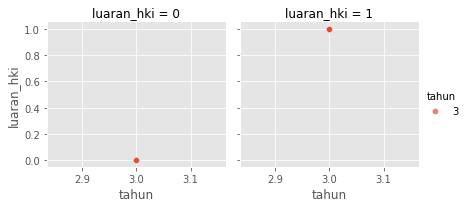

In [ ]:
g = sns.FacetGrid(df_N, col="luaran_hki", hue="tahun")
g.map(sns.scatterplot, "tahun", "luaran_hki", alpha=.7)
g.add_legend()